In [1]:
import pandas as pd
df = pd.read_csv('height-weight.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 372.0 bytes


In [3]:
df.columns

Index(['Height', 'Weight'], dtype='object')

In [4]:
df.shape

(15, 2)

In [5]:
df['Height'] = df['Height'] * 100

In [6]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
train_data

,Height,Weight
13,180.0,72.19
5,160.0,58.57
8,168.0,63.11
2,152.0,54.48
1,150.0,53.12
14,183.0,74.46
4,157.0,57.20
7,165.0,61.29
10,173.0,66.28
12,178.0,69.92


In [8]:
test_data

,Height,Weight
9,170.0,64.47
11,175.0,68.10
0,147.0,52.21


In [9]:
X_train = train_data['Height']
y_train = train_data['Weight']
X_test = test_data['Height']
y_test = test_data['Weight']

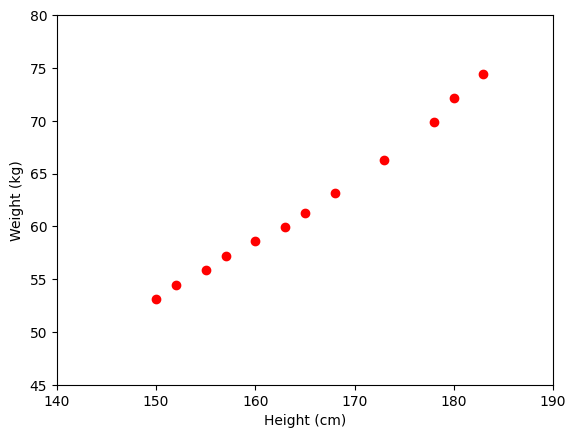

In [12]:
import matplotlib.pyplot as plt
plt.plot(X_train, y_train, 'ro')
plt.axis([140, 190, 45, 80])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [15]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

w =  [[-42.17860896]
 [  0.63131719]]


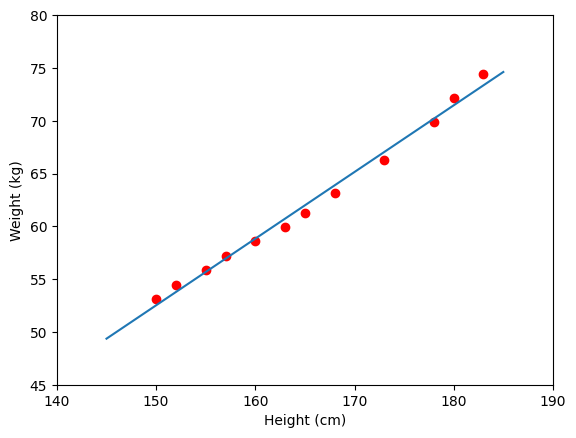

In [27]:
import numpy as np
# Building X_bar
one = np.ones((X_train.shape[0], 1))
X_bar = np.concatenate((one, X_train), axis = 1)

# Calculating weights of the fitting line
A = np.dot(X_bar.T, X_bar)
b = np.dot(X_bar.T, y_train)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line
plt.plot(X_train, y_train, 'ro')
plt.plot(x0, y0)
plt.axis([140, 190, 45, 80])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = w_0 + X_test * w_1
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)

print("R-squared:", r2)

Mean Squared Error: 1.0029930837618248
R-squared: 0.9782994097411816


In [31]:
y1 = w_0 + 146 * w_1
print('The weight of a person with 146cm height will be: ', y1)

The weight of a person with 146cm height will be:  49.99370096861538
